In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### load Data


In [2]:
data=pd.read_csv("bank.csv", delimiter=";")
data.head()
data.shape

(4521, 17)

### Exploratory Data Analyss(EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


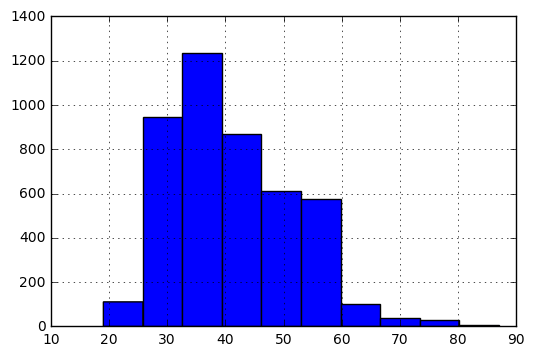

In [3]:
data.info()
data.age.hist()

*Most clieents have an age range between [25,60]
*bank only interested in the working class 


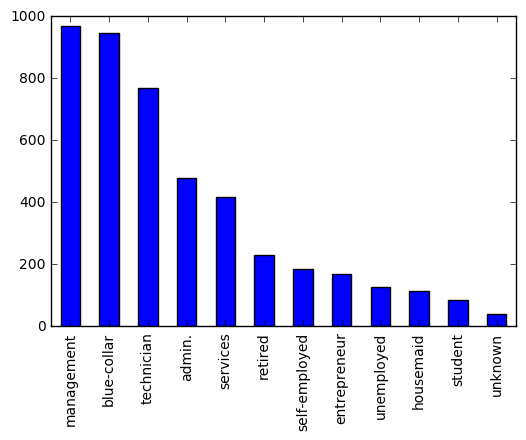

In [4]:
data.job.value_counts().plot(kind='bar')

- most pupular target clients are in management and blue-collar job
- 38 have unknown jobs 
- 84 clients are students 

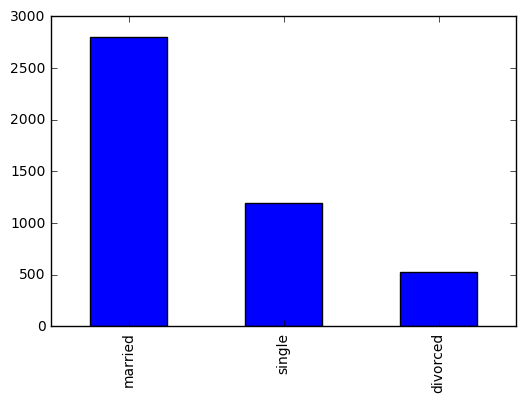

In [5]:
data.marital.value_counts().plot(kind='bar')

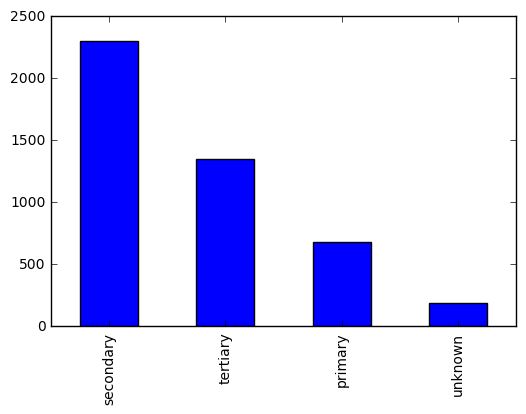

In [6]:
data.education.nunique()
data.education.value_counts().plot(kind='bar')


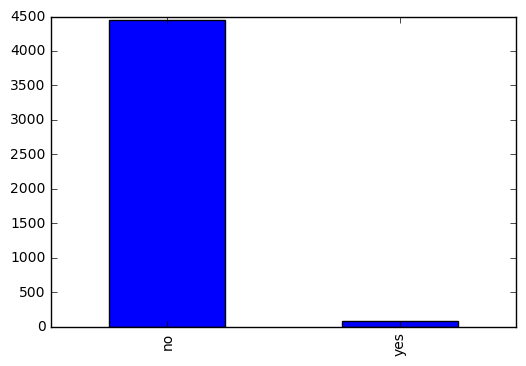

In [7]:
data.default.unique()
data.default.value_counts().plot(kind='bar')


- Most of clients have no credit default 

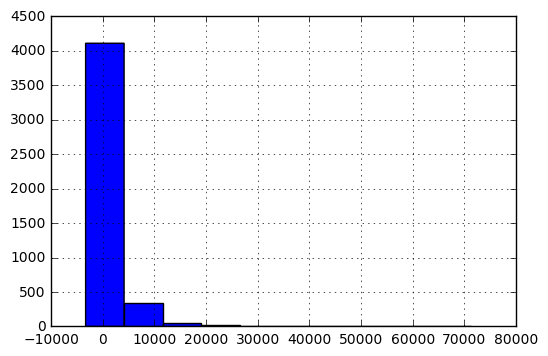

In [8]:
data.balance.hist()

In [9]:
data["target"] = data.y
data.drop("y" , axis=1 ,inplace=True)


In [10]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome target  
0  cellular   19   oct        79         1     -1         0  unknown     no  
1  cellular   11   may       220         1    339         4  failure     no  
2  cellular   16   apr       185         1    330         1  failure     no  
3   unknown    3   jun       199         4     -1         0  unknown     no  
4   unknown    5   may       226         1     -1         0  unknown     no

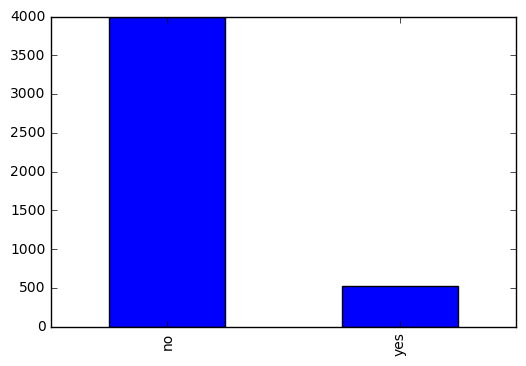

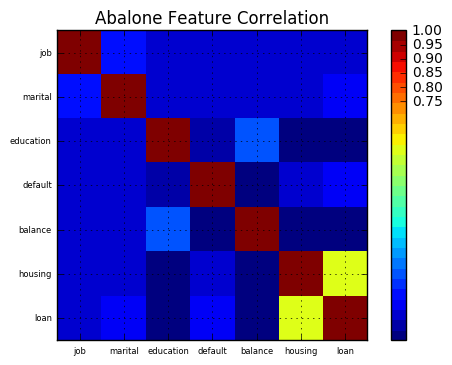

In [11]:
data.target.value_counts().plot(kind='bar')

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=data.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data)

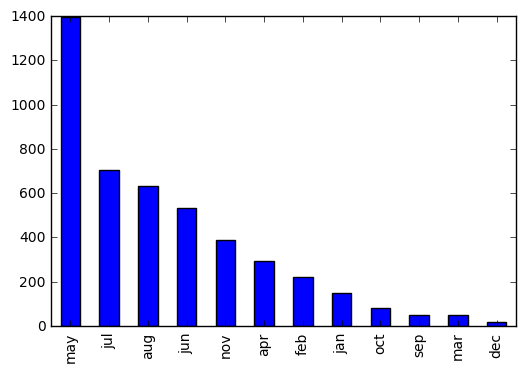

In [12]:
data.month.value_counts().plot(kind='bar')

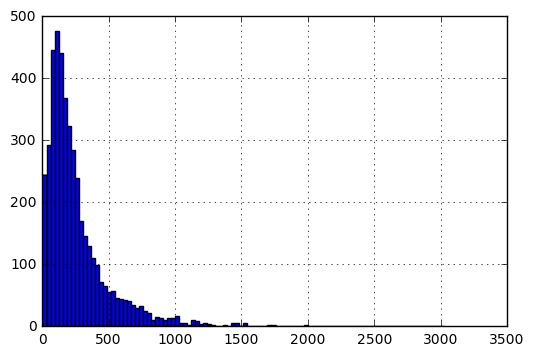

In [13]:
data.duration.hist(bins = 100)

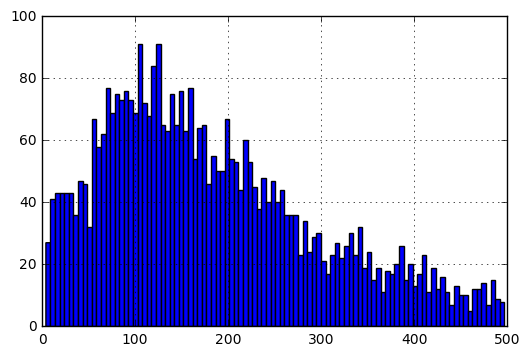

In [14]:
data[data.duration < 500].duration.hist(bins = 100)

- Most calls are between 0 to 250 sec( 4 min )

In [15]:
data['is_new']= data.pdays


In [16]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome target  \
0  cellular   19   oct        79         1     -1         0  unknown     no   
1  cellular   11   may       220         1    339         4  failure     no   
2  cellular   16   apr       185         1    330         1  failure     no   
3   unknown    3   jun       199         4     -1         0  unknown     no   
4   unknown    5   may       226         1     -1         0  unknown     no   

   is_new  
0      -1  
1     339  
2     330  
3      -1  
4      -1

In [17]:
def set_client(x):
    if (x==-1):
        return 1
    return 0

In [18]:
data.is_new = data.is_new.apply(set_client)

In [19]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome target  \
0  cellular   19   oct        79         1     -1         0  unknown     no   
1  cellular   11   may       220         1    339         4  failure     no   
2  cellular   16   apr       185         1    330         1  failure     no   
3   unknown    3   jun       199         4     -1         0  unknown     no   
4   unknown    5   may       226         1     -1         0  unknown     no   

   is_new  
0       1  
1       0  
2       0  
3       1  
4       1

In [20]:
def set_job(x):
    if x=="unknown":
        return 0
    return 1

In [21]:
data["is_job"]=data.job.apply(set_job)

In [22]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome target  \
0  cellular   19   oct        79         1     -1         0  unknown     no   
1  cellular   11   may       220         1    339         4  failure     no   
2  cellular   16   apr       185         1    330         1  failure     no   
3   unknown    3   jun       199         4     -1         0  unknown     no   
4   unknown    5   may       226         1     -1         0  unknown     no   

   is_new  is_job  
0       1       1  
1       0       1  
2       0       1  
3       1       1  
4       1       1

In [23]:
data[data.job=="unknown"].head()

age      job  marital  education default  balance housing loan   contact  \
95    41  unknown   single   tertiary      no     1567      no   no  cellular   
178   37  unknown  married    unknown      no     1699      no   no   unknown   
230   52  unknown  married  secondary      no      142      no   no  cellular   
641   56  unknown  married    unknown      no        0      no   no   unknown   
779   55  unknown  married    primary      no      159      no   no   unknown   

     day month  duration  campaign  pdays  previous poutcome target  is_new  \
95     1   jul       291         2     -1         0  unknown     no       1   
178    9   jun        63         1     -1         0  unknown     no       1   
230   25   aug       112         6     -1         0  unknown     no       1   
641   20   jun       471         2     -1         0  unknown     no       1   
779    4   sep        15         1     -1         0  unknown     no       1   

     is_job  
95        0  
178       0  
230       0  
641       0  
779       0

In [24]:
data.job.replace("unknown" , data.job.mode()[0], inplace =True)

In [25]:
data[data.job=="unknown"].shape

(0, 19)

In [26]:
data.age.replace("NA" , data.age.mean()) # data["age"].fillna(data.age.mean(),inplace=True)

0       30
1       33
2       35
3       30
4       59
5       35
6       36
7       39
8       41
9       43
10      39
11      43
12      36
13      20
14      31
15      40
16      56
17      37
18      25
19      31
20      38
21      42
22      44
23      44
24      26
25      41
26      55
27      67
28      56
29      53
        ..
4491    35
4492    32
4493    28
4494    26
4495    48
4496    30
4497    31
4498    31
4499    45
4500    38
4501    34
4502    42
4503    60
4504    42
4505    32
4506    42
4507    33
4508    42
4509    51
4510    36
4511    46
4512    40
4513    49
4514    38
4515    32
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, dtype: int64

In [27]:
for feature in data.columns:
    print (feature +"\t" + str (data[feature].isnull().sum()))
    


age	0
job	0
marital	0
education	0
default	0
balance	0
housing	0
loan	0
contact	0
day	0
month	0
duration	0
campaign	0
pdays	0
previous	0
poutcome	0
target	0
is_new	0
is_job	0


In [28]:
def set_0_1(x):
    if x== "yes":
        return  1
    return 0

In [29]:
data.default = data.default.apply(set_0_1)

In [30]:
data.head()

age          job  marital  education  default  balance housing loan  \
0   30   unemployed  married    primary        0     1787      no   no   
1   33     services  married  secondary        0     4789     yes  yes   
2   35   management   single   tertiary        0     1350     yes   no   
3   30   management  married   tertiary        0     1476     yes  yes   
4   59  blue-collar  married  secondary        0        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome target  \
0  cellular   19   oct        79         1     -1         0  unknown     no   
1  cellular   11   may       220         1    339         4  failure     no   
2  cellular   16   apr       185         1    330         1  failure     no   
3   unknown    3   jun       199         4     -1         0  unknown     no   
4   unknown    5   may       226         1     -1         0  unknown     no   

   is_new  is_job  
0       1       1  
1       0       1  
2       0       1  
3       1       1  
4       1       1

In [31]:
data.housing = data.housing.apply(set_0_1)
data.loan = data.loan.apply(set_0_1)
data.target = data.target.apply(set_0_1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 19 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null int64
balance      4521 non-null int64
housing      4521 non-null int64
loan         4521 non-null int64
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
target       4521 non-null int64
is_new       4521 non-null int64
is_job       4521 non-null int64
dtypes: int64(13), object(6)
memory usage: 671.2+ KB


In [33]:
data[data.is_new==1].poutcome.value_counts()

unknown    3705
Name: poutcome, dtype: int64

In [34]:
data[data.is_new==0].poutcome.value_counts()

failure    490
other      197
success    129
Name: poutcome, dtype: int64

In [35]:
def set_poutcome(x):
    if x=="unknown":
        return 0
    if x== "failure":
        return 1
    if x=="success":
        return 2
    return 3
    

In [36]:
data.poutcome=data.poutcome.apply(set_poutcome)

In [37]:
data.head()

age          job  marital  education  default  balance  housing  loan  \
0   30   unemployed  married    primary        0     1787        0     0   
1   33     services  married  secondary        0     4789        1     1   
2   35   management   single   tertiary        0     1350        1     0   
3   30   management  married   tertiary        0     1476        1     1   
4   59  blue-collar  married  secondary        0        0        1     0   

    contact  day month  duration  campaign  pdays  previous  poutcome  target  \
0  cellular   19   oct        79         1     -1         0         0       0   
1  cellular   11   may       220         1    339         4         1       0   
2  cellular   16   apr       185         1    330         1         1       0   
3   unknown    3   jun       199         4     -1         0         0       0   
4   unknown    5   may       226         1     -1         0         0       0   

   is_new  is_job  
0       1       1  
1       0       1  
2       0       1  
3       1       1  
4       1       1

In [38]:
from sklearn.preprocessing  import LabelEncoder 

In [39]:
lb=LabelEncoder()

In [40]:
data.month=lb.fit_transform(data.month)

In [41]:
data.head()

age          job  marital  education  default  balance  housing  loan  \
0   30   unemployed  married    primary        0     1787        0     0   
1   33     services  married  secondary        0     4789        1     1   
2   35   management   single   tertiary        0     1350        1     0   
3   30   management  married   tertiary        0     1476        1     1   
4   59  blue-collar  married  secondary        0        0        1     0   

    contact  day  month  duration  campaign  pdays  previous  poutcome  \
0  cellular   19     10        79         1     -1         0         0   
1  cellular   11      8       220         1    339         4         1   
2  cellular   16      0       185         1    330         1         1   
3   unknown    3      6       199         4     -1         0         0   
4   unknown    5      8       226         1     -1         0         0   

   target  is_new  is_job  
0       0       1       1  
1       0       0       1  
2       0       0       1  
3       0       1       1  
4       0       1       1

In [42]:
object_features=[]
for feature in data.columns:
    if data[feature].dtype==object:
        object_features.append(feature)

In [43]:
object_features

['job', 'marital', 'education', 'contact']

In [44]:
for feature in object_features:
    data[feature] = lb.fit_transform(data[feature])

In [45]:
data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  target  is_new  \
0   19     10        79         1     -1         0         0       0       1   
1   11      8       220         1    339         4         1       0       0   
2   16      0       185         1    330         1         1       0       0   
3    3      6       199         4     -1         0         0       0       1   
4    5      8       226         1     -1         0         0       0       1   

   is_job  
0       1  
1       1  
2       1  
3       1  
4       1

# Training


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [47]:
tree=DecisionTreeClassifier()

In [48]:
target=data.pop("target")

In [49]:
tree.fit(data,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [50]:
data.shape

(4521, 18)

In [51]:
limit=int(4521*0.8)

In [52]:
train=data.iloc[0:limit,:]
test=data.iloc[limit:,:]


In [53]:
print(train.shape,test.shape)

(3616, 18) (905, 18)


In [54]:
train_y=target[0:limit]
test_y=target[limit:]

In [55]:
tree.fit(train,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [56]:
tree.fit(train,train_y)
pred=tree.predict(test)
accuracy_score(pred,test_y)

0.8685082872928177

In [57]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(test_y,pred)
conf

array([[740,  54],
       [ 65,  46]])

In [58]:
y_true=pd.Series(test_y.tolist())
y_pred=pd.Series(pred.tolist())
print (y_true.shape,y_pred.shape)
pd.crosstab(y_true,
            y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True
            )
           
           

(905,) (905,)


Predicted    0    1  All
True                    
0          740   54  794
1           65   46  111
All        805  100  905

In [59]:
sample =test.iloc[0]
pred_sample= tree.predict(sample.reshape(1,-1))
pred_sample

array([0], dtype=int64)

In [60]:
proba=tree.predict_proba(sample.reshape(1,-1))
proba    # appartient au classe 0

array([[ 1.,  0.]])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(train,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
pred=knn.predict(test)
accuracy_score(pred,test_y)

0.8596685082872928

In [63]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(train,train_y)
pred=svc.predict(test)
accuracy_score(pred,test_y)

0.8773480662983425

In [64]:
y_true=pd.Series(test_y.tolist())
y_pred=pd.Series(pred.tolist())
print (y_true.shape,y_pred.shape)
pd.crosstab(y_true,
            y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True
            )
           
           

(905,) (905,)


Predicted    0  All
True               
0          794  794
1          111  111
All        905  905

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(train,train_y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [66]:
pred=rf.predict(test)
accuracy_score(pred,test_y)

0.8906077348066298

In [67]:
y_true=pd.Series(test_y.tolist())
y_pred=pd.Series(pred.tolist())
print (y_true.shape,y_pred.shape)
pd.crosstab(y_true,
            y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True
            )

(905,) (905,)


Predicted    0   1  All
True                   
0          784  10  794
1           89  22  111
All        873  32  905

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier(n_estimators=500,n_jobs=-1)
ext.fit(train,train_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [69]:
pred=ext.predict(test)
accuracy_score(pred,test_y)

0.8906077348066298

In [70]:
y_true=pd.Series(test_y.tolist())
y_pred=pd.Series(pred.tolist())
print (y_true.shape,y_pred.shape)
pd.crosstab(y_true,
            y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True
            )

(905,) (905,)


Predicted    0   1  All
True                   
0          785   9  794
1           90  21  111
All        875  30  905

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
Gb=GradientBoostingClassifier()
Gb.fit(train,train_y)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [72]:
y_true=pd.Series(test_y.tolist())
y_pred=pd.Series(pred.tolist())
print (y_true.shape,y_pred.shape)
pd.crosstab(y_true,
            y_pred,
            rownames=['True'],
            colnames=['Predicted'],
            margins=True
            )

(905,) (905,)


Predicted    0   1  All
True                   
0          785   9  794
1           90  21  111
All        875  30  905

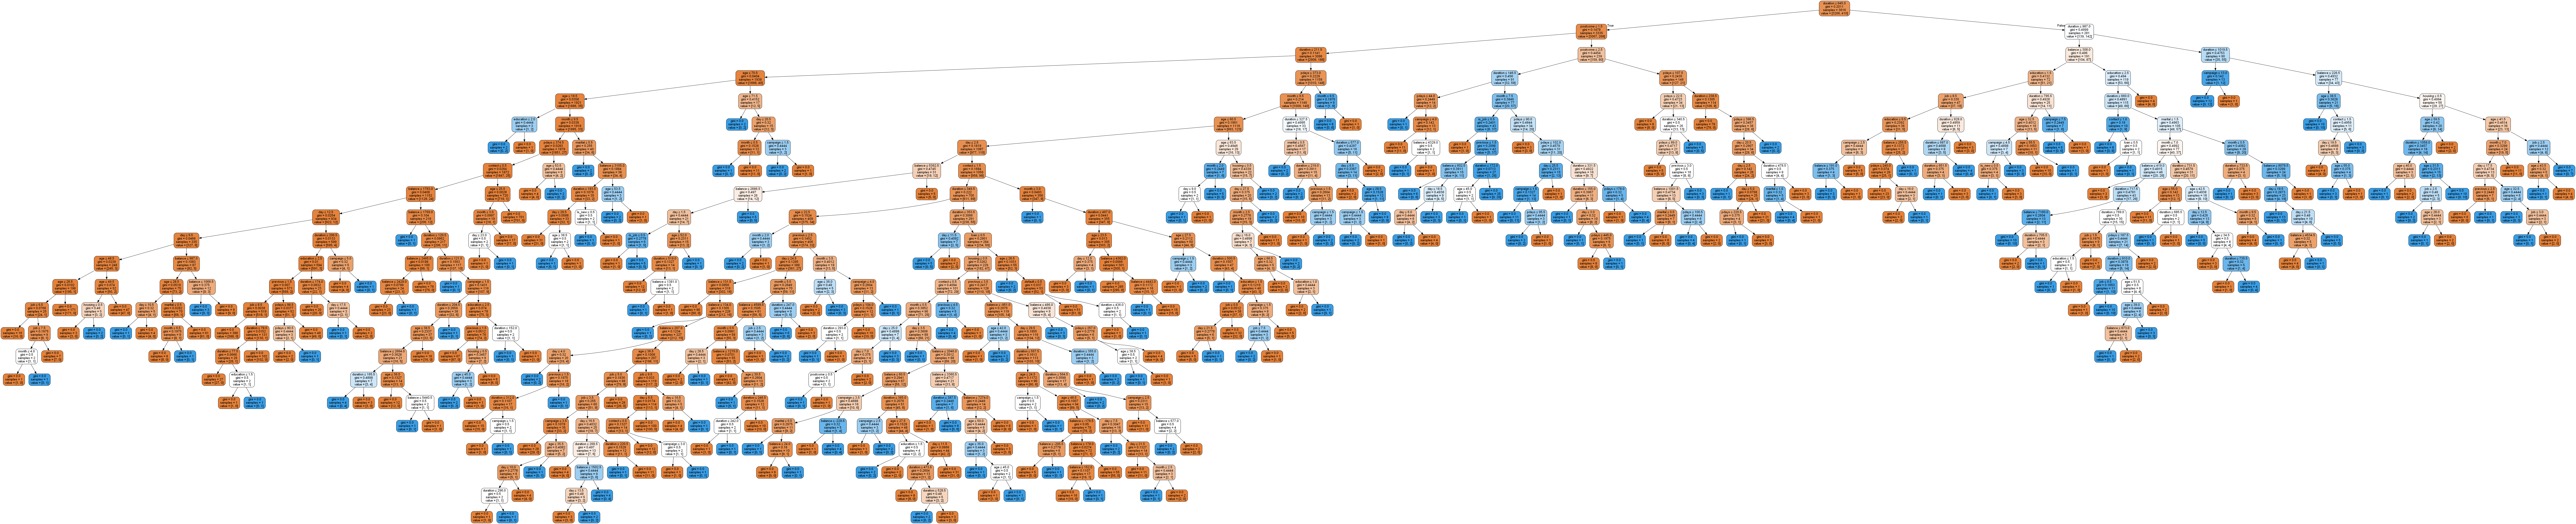

In [73]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(train,train_y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



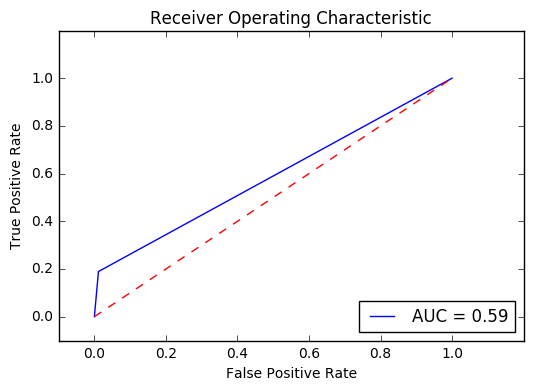

In [74]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
